# Modeling & Predicting Heart Disease Classification with Machine Learning!!

In this notebook, machine learning and fundamental data science concepts are employed to explore, model, and make predictions on the given dataset. It is intended to be an example of a Data Scientist's proof of concept. 


### What Is Classification In Machine Learning?

Classification is a process of categorizing a dataset into classes. Our data is structured but classification can be performed on both structured or unstructured data. The process begins with predicting the class of given data points. These classes are usually refferd to as target, label or categories.

With classification in predictive modeling, we approximate the mapping function from input variables to discrete output variables. The main objective is to decide whether a sample is part of one class or another (single-class classification), predicting which class/category the new data will belong in.


### Scientific Approach & Framework 

The following machine learning modelling framework will be used (data is present in .csv format).

**6 Step Machine Learning Modelling Framework:**
1. Defining the problem    
2. Understanding the data available    
3. Defining Success    
4. Feature Engineering     
5. Modeling    
6. Continual Experimentation

### The Goal

The goal is to create few machine learning models that can all predict whether or not a person has heart disease based on a number of different parameters, with considerable accuracy. If possible, to describe which parameters are more indicative than others (sex, age, chol, etc).

> Topics & Tasks Covered...

* **Exploratory data analysis (EDA)** - the process of going through a dataset and understanding as much about it as possible.
* **Model training** - create model(s) to learn to predict a target variable, based on other variables.
* **Model evaluation** - evaluating a model's predictions using business logic, KPIs, or problem-specific evaluation metrics.
* **Model comparison** - compare and contrast various models to find and select the best.
* **Model fine-tuning** - how can the best baseline model be improved upon?
* **Feature importance** - establishing any features that may be weighted heavier in predicting the presence of heart disease. 
* **Cross-validation** - doing our best to ensure it will work on unseen data.
* **Reporting what we've found** - via this notebook!


## 1. Defining the Problem

This problem is solved by categorizing a sample as one of two things, so **binary classification** will be explored as a potential solution. Multiple features (pieces of patient information) are used to predict if a person has heart disease or not. 

With personal information and clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. The Available Data

**The Original Data Source:** the Cleveland database from UCI Machine Learning Repository.

**Download Source:** Kaggle.

**Creators:**
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

The original database contains 76 attributes, but only 14 attributes (features) are used. Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

Simply put, independent variables (medical attributes) will be used to predict the dependent variable (heart disease or no heart disease).


## 3. Defining Success

Establishing a baseline **evaluation metric** to maintain focus and aim within the project during experimentation.

> If 95% accuracy at predicting whether or not a patient has heart disease is reached during the proof of concept, the project will be progressed. 


Note: Typically, in machine learning experimentation an evaluation metric will change over time.


## 4. Features

Understanding as much as possible about the features and attributes on which the predictions will be made is critical. A ** data dictionary** or glossary helps to list findings and greater attribute detail. 

### Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


### Preparing the tools

The Python libraries used in the project are listed below (dependencies):

    * Pandas for data analysis.
    * NumPy for numerical operations.
    * Matplotlib & Seaborn for plotting and visualizing data.
    * Scikit-Learn for machine learning modelling and evaluation.


In [20]:
# Importing EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Ensuring our plots appear in the jupyter notebook
%matplotlib inline 

## Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


### Loading the Data

The data is stored in .csv format (similar to what you'd see in an Excel file).

Pandas has a built-in function to read .csv files called read_csv() which takes the file pathname of a .csv file. Load the data into a Pandas DataFrame. 


In [22]:
# loading the .csv into a DataFrame and checking its shape
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)


(303, 14)

### Data Exploration (exploratory data analysis or EDA)

During exploratory data analysis, heavy interrogation and investigation of the data is perfomed. We will compare different columns, to each other, to target variables, build on the data glossary and more. 

Questions to keep in mind during EDA:

    1. What question is trying to be proven false?
    2. What kind of data is available and how may different types need to be handled?
    3. What’s missing from the data and how will missing information be addressed?
    4. Where are the outliers if any and why should they matter?
    5. What features can be added, changed or removed to enrich (get more out of) the data?


In [4]:
# checking the top 5 rows of the dataframe (heart-disease.csv)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# checking the top 20 rows of the dataframe (heart-disease.csv)
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**Note:** With `value_counts()`, we can total how many times each of the values in a categorical column appear.

In [12]:
# counting how many positive (1) and negative (0) samples are present in this dataframe
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [13]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

#### Balanced vs. Unbalanced Target Columns (Labels)

Since these two values are close in measure, the target column can be considered **balanced**. An **unbalanced** target column, may be more difficult to model as some classes will have far more samples. Ideally, all target classes have the same number of samples.

To view these values in percentages, use the value_counts() normalize parameter, and set it to true.


Plotting the target column value counts.

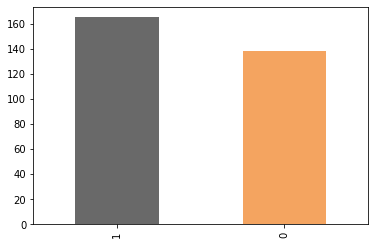

In [35]:
# plotting the value counts with a bar graph
df.target.value_counts().plot(kind="bar", color=["dimgray", "sandybrown"]);

**`df.info()`** displays insight into the number of missing values in the respective columns and the data types.

All columns are numerical and there are no missing values.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**`describe()`** is another way to get fast summarized insights on the dataframe. It shows a table of different metrics on the  numerical columns such as mean, max and standard deviation.


In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing Two Columns

Using `crosstab()`, two columns can be compared to gain understanding and intuition on how independent variables effect the dependent variables.

**example:** comparing the target and sex columns.


In [26]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

**Number of males** = 207

**Number of females** = 96


In [27]:
# comparing the target and sex columns 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


What can be derived from this? 

Since there are roughly 100 women, and 72 of them have a postive value of heart disease being present, we may anticipate, if the participant is a woman, there's a 75% chance she has heart disease. Whereas with males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

**Baseline:** Averaging these two values and no othe parameters, we can assume if there's a person, there is a 62.5% chance they have heart disease.

This will be the simplified baseline and we can try to beat it with machine learning!


### Making our crosstab visual

I found it useful to plot the crosstab by using the plot() function and passing it a few parameters like, kind (the type of plot you want), figsize=(length, width) and color=[colour_1, colour_2].


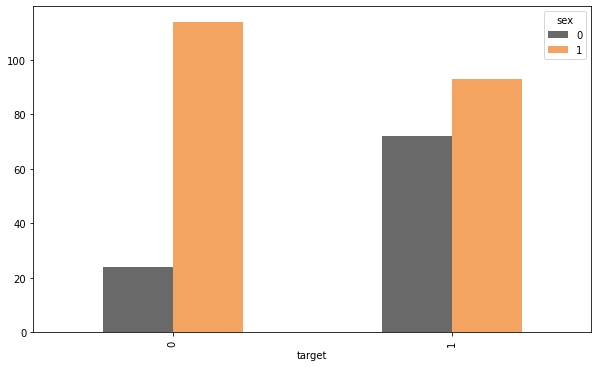

In [36]:
# creating a bar plot
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["dimgray", "sandybrown"]);


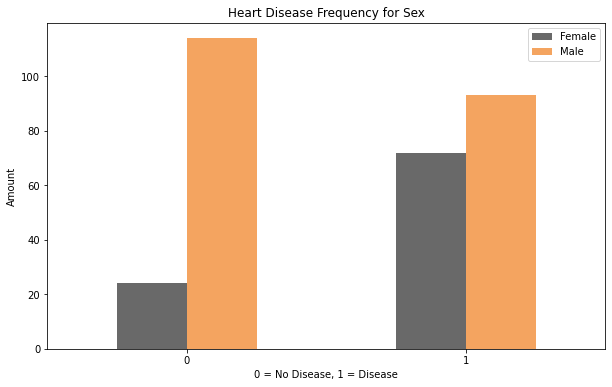

In [34]:
# creating a better looking plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["dimgray", "sandybrown"])

# adding descriptive attributes 
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis


## Age vs Max Heart rate for Heart Disease

Combining a couple of independent variables like age and thalach (maximum heart rate) to compare to the target variable, heart disease.

With so many different values for age and thalach respectively, a scatter plot will be more digestible.


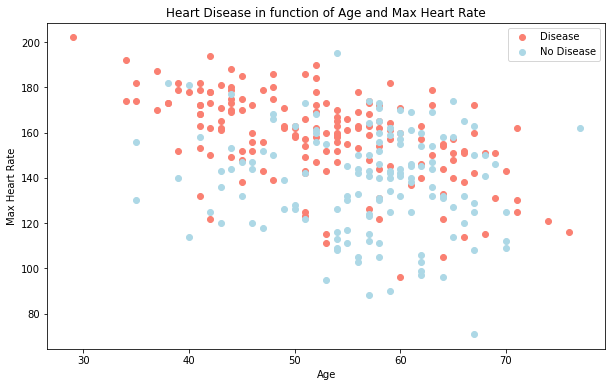

In [37]:
# Create another figure
plt.figure(figsize=(10,6))

# begin with scattering the positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# next, the negative examples and place them on the same plot (call plt again)
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# adding some helpful detail
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");


Checking column **distribution**.

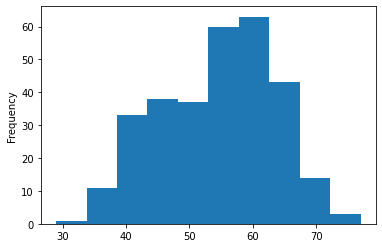

In [38]:
# checking the age distribution using a histogram
df.age.plot.hist();

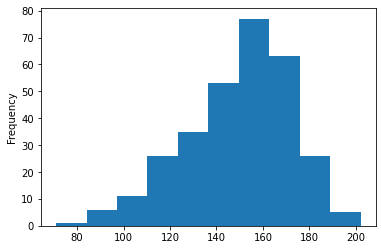

In [39]:
# checking the thalach distribution
df.thalach.plot.hist();

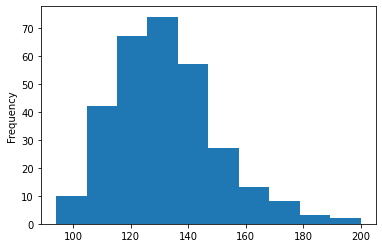

In [42]:
# checking the trestbps distribution
df.trestbps.plot.hist();

### Heart Disease Frequency per Chest Pain Type

**Independent variable** - cp (chest pain).


In [43]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


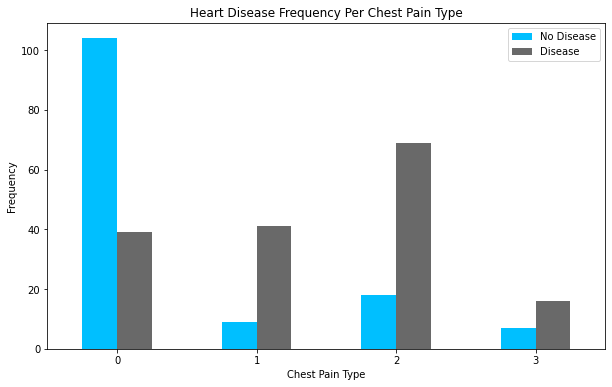

In [45]:
# creating a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["deepskyblue", "dimgray"])

# adding attributes to the plot for legibility
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

**Note:** 
> 1. cp - chest pain type
        * 0: Typical angina: chest pain related decrease blood supply to the heart
        * 1: Atypical angina: chest pain not related to heart
        * 2: Non-anginal pain: typically esophageal spasms (non heart related)
        * 3: Asymptomatic: chest pain not showing signs of disease

"Atypical angina" - is mentioned in the data dictionary to NOT be related to the heart but seems to have a higher ratio of participants with heart disease than not. 

After research, this attribute and others may require additional insight from a subject matter expert (Cardiologist) as even some medical professionals are confused by the term (definition). Great to find out more about the data.

### The Correlation Between Independent Variables

Compare all of the independent variables at once.

This might hint at which independent variables may or may not have an impact on the target variable.

Using **`corr()`** to create a correlation matrix. Effectively, the matrix is a large table that displays how related each variable is to one another.

In [46]:
# finding the correlation between the independent variables
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


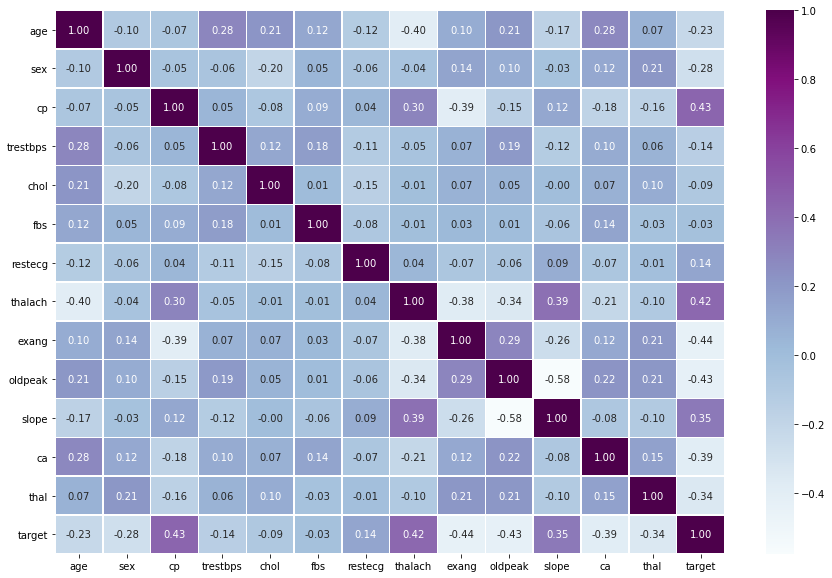

In [49]:
# making a better correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="BuPu");

A higher positive value means a potential positive correlation (increase). 

A higher negative value means a potential negative correlation (decrease).


## 5. Modeling

During modeling we will attempt to use machine learning to predict the target variable based on the 13 independent variables. 

> **The Question:** Can we predict whether or not a patient has heart disease with the given clinical parameters?

> **Repeated Evaluation Metric:** If 95% accuracy at predicting whether or not a patient has heart disease is reached during the proof of concept, the project will be progressed. 


In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We need to separate the target variable from the rest of variable column.

In [52]:
# everything except target variable
X = df.drop("target", axis=1)

# target variable
y = df.target.values

In [54]:
# the independent variables (data with NO target column)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
# targets
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Training and test split

This is where the data is split into a **training set** and a **test set**.

We'll use the training set to train your model and your test set, to test it.

The test set must remain separate from your training set!

#### Why not use all the data to train a model?

If we wanted to take the finished model to the hospital and deploy to start using it on patients, there would be no way to know how well it does on a new patient who was Not included in the original full dataset.

This is why a test set is needed. It helps model to a real world environment as much as possible.

Also, this is why it's so important to Never let the model learn from the test set! It should only be evaluated on it.


To split the data into a training and test set, we will use Scikit-Learn's `train_test_split()` and give it our independent and dependent variables (X & y).


In [56]:
# Random seed for reproducibility
np.random.seed(25)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

A general rule of thumb is to use 80% of your data to train on and the other 20% to test on.



In [57]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [58]:
y_train, len(y_train)

(array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
       dtype=int64),
 242)

There are 242 samples to train on.

In [59]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2


In [60]:
y_test, len(y_test)

(array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64),
 61)

There are 61 examples to test our model(s) on.

### ML Model choices

With the data prepared, we can start to fit models comparing their results:

1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. RandomForest - `RandomForestClassifier()`


Machine Learning and Data Science is an iterative process and the listed algorithms are tools to aid experimentation. 

All algorithms in the Scikit-Learn library use the same functions for training a model, `model.fit(X_train, y_train)` and for scoring a model, `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

We will put the algorithms in a dictionary. Because the algorithms implement the same methods for fitting to the data as well as evaluating them, we can define a function that fits and scores them all (to avoid repeating code).


In [61]:
# putting the models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with the training data
    y_test : labels assosciated with the test data
    """
    # a random seed for reproducible results
    np.random.seed(25)
    # making a list to keep model scores
    model_scores = {}
    # looping through the models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [62]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Ted\tornado\heart-disease-project-01\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.7704918032786885,
 'Random Forest': 0.819672131147541}

Now that the models are fitting, compare them visually.

### Model Comparison

With the model scores saved to a dictionary, Convert them to a DataFrame and then plot them.


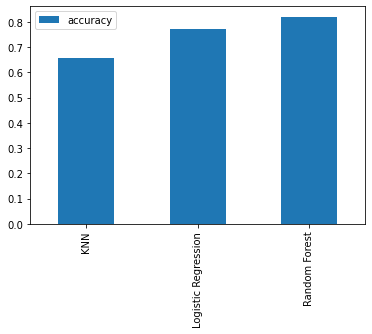

In [64]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Model Evaluation Terminology

Model scoring, comparison, and tuning:

* **Hyperparameter tuning** - Each model has a series of adjustable stock dials to dictate how they perform. Changing values may increase or decrease model performance.
* **Feature importance** - When there is a large amount of features used to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex, cp, or age?
* **Confusion matrix** - Compares the predicted values with the true values in a tabular format. For perspective, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* **Cross-validation** - Splits the dataset into multiple parts, trains and tests the model on each part, and evaluates performance as an average.
* **Precision** - Proportion of true positives over total number of samples. A higher precision leads to less false positives.
* **Recall** - Proportion of true positives over total number of true positives and false negatives. A higher recall leads to less false negatives.
* **F1 score** - Combines precision and recall into one metric. 1 is the best. 0 is the worst.
* **Classification report** - Sklearn has a built-in function called `classification_report()` that returns some of the main classification metrics like precision, recall, and f1-score.
* **ROC Curve** - Receiver Operating Characterisitc, is a plot of true positive rate versus false positive rate.
* **Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.


### Hyperparameter tuning and cross-validation

We will make slight adjustments to the machine learning algorithm hyperparameters (settings) to see if different results are acheived. 

When tuning hyperparameters, we risk both over-fitting and under-fitting for performance. We will use cross-validation to test different hyperparameters.

K-Fold involves splitting the data into `k` folds and then testing a model on each. `k` represents the number of folds.

The aim is to find hyperparameter adjustments that reside in the "goldilocks zone" and will help the final model perform well with unseen examples as well.

**NEXT STEPS:**

1. Tune model hyperparameters and see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features


### To Tune KNeighborsClassifier (K-Nearest Neighbors / KNN) by Hand...

The main hyperparameter to tune a KNN algorithm is the number of neighbors `(n_neighbors=5)`.
   * If n_neighbors=5 then it assumes a dot with the 5 closest dots around it are in the same class.


In [65]:
# creating a list for train scores
train_scores = []

# creating a list for test scores
test_scores = []

# creating a list of different values for n_neighbors (1 to 20)
neighbors = range(1, 21)

# instantiate the model
knn = KNeighborsClassifier()

# looping through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [66]:
train_scores

[1.0,
 0.7975206611570248,
 0.756198347107438,
 0.731404958677686,
 0.7479338842975206,
 0.7520661157024794,
 0.7603305785123967,
 0.7396694214876033,
 0.7272727272727273,
 0.7148760330578512,
 0.71900826446281,
 0.7066115702479339,
 0.7024793388429752,
 0.7148760330578512,
 0.6983471074380165,
 0.7107438016528925,
 0.7231404958677686,
 0.7231404958677686,
 0.7272727272727273,
 0.7272727272727273]

Maximum KNN score on the test data: 67.21%


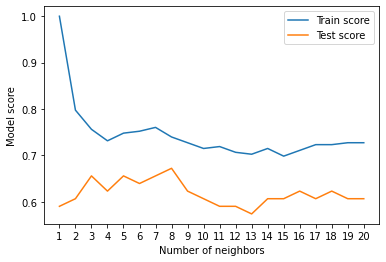

In [67]:
# plotting the train scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Inspecting the graph, n_neighbors = 8 seems best.


**Note:** Although, the model can be optimized a bit, it will be disgarded in favor of the remaining two because the performance can not compete.


### Tuning models with with RandomizedSearchCV

We will tune the LogisticsRegression and RandomForestClassifier using RandomizedSearchCV (instead of by hand).

First, create a hyperparameter grid (a dict of different hyperparameters) for each before testing them out.


In [68]:
# LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


Use `RandomizedSearchCV` to tune the `LogisticRegression` model.

* pass hyperparameters from `log_reg_grid` 
* set `n_iter` = 20 (`RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones).

In [69]:
# random seed
np.random.seed(25)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [70]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [71]:
rs_log_reg.score(X_test, y_test)

0.7868852459016393

Now, tune the `RandomForestClassifier` with `RandomizedSearchCV`.

In [72]:
# random seed
np.random.seed(25)

# setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [73]:
# get the best parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_depth': None}

In [74]:
# evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8032786885245902

There was a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression` after hyperparamter tuning.

`LogisiticRegression` is showing more promise so we will use it to perform further hyperparamter tuning using `GridSearchCV`.


### Tuning A Model with GridSearchCV

`RandomizedSearchCV` searches over a grid of hyperparameters performing n_iter combinations, whereas `GridSearchCV` will test every single possible combination.

* `RandomizedSearchCV` - tries n_iter combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.


In [127]:
# random seed
# np.random.seed(25)

# LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [128]:
# get the best parameters
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [129]:
# evaluate the model
gs_log_reg.score(X_test, y_test)

0.7868852459016393

The results are similar and slightly less optimal than found with `RandomizedSearchCV` in this case. More hyperparameter tuning can be performed for optimization. 

   **Note:** If there are a large amount of hyperparameters combinations in the grid, `GridSearchCV` may take a long time to try them all. `RandomizedSearchCV` is a good option to get started and try a certain amount of combinations before using `GridSearchCV` to refine them.


### Evaluating a classification model, beyond accuracy

With a tuned model, let's investigate some of the metrics mentioned earlier:

* ROC curve and AUC score - `plot_roc_curve()`
* Confusion matrix - `confusion_matrix()`
* Classification report - `classification_report()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-score - `f1_score()`

Scikit-Learn has them all built-in!


### Making Predictions On the Test Data

In [131]:
# make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [132]:
y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [133]:
y_test

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

#### ROC Curves & AUC Scores

ROC curve: Understanding how the model is performing by comparing the true positive rate to the false positive rate.

The `plot_roc_curve` function we can see it takes `(estimator, X, y)` as inputs; where estiamator is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

We are using the `GridSearchCV` version of our `LogisticRegression` estimator, `gs_log_reg` as well as the test data, `X_test` and `y_test`.


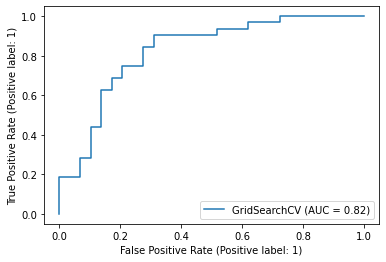

In [135]:
# importing the ROC curve function from the metrics module
from sklearn.metrics import plot_roc_curve

# plotting the ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

The area in the upper left of the graph represents the room for imporovement in our model. A perfect model would achieve an AUC score of 1.0.

#### Confusion Matrix

Visualizing where the model made the correct predictions and where it made the wrong predictions.

We will use Scikit-Learn's built-in `confusion_matrix()`, passing it both the predicted labels and true labels.

In [136]:
# display the confusion matrix (Scikit-Learn)
print(confusion_matrix(y_test, y_preds))

[[20  9]
 [ 4 28]]


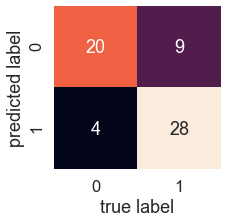

In [137]:
# display the confusion matrix (Seaborn)
import seaborn as sns
sns.set(font_scale=1.5) 

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

There are 9 occasaions where the model predicted 0 when it should've been 1 (false negative) and 4 occasions where the model predicted 1 instead of 0 (false positive).


#### Classification Report

Pass the true labels as well as our models predicted labels to `classification_report()`.

In [138]:
# show the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model that produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model that produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - The average precision, recall and F1 score between classes. Macro avg does NOT class imbalance into effort, so if there are class imbalances, pay attention to this metric.
* **Weighted avg** - The weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


Now, use the best model with the best hyperparamters with `cross_val_score()` and different scoring parameter values.

In [139]:
# get the best hyperparameters
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [140]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.08858667904100823,
                         solver="liblinear")

In [141]:
# cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, 
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [142]:
# averaging the 5
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [143]:
# cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8182683982683983

In [144]:
# cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9030303030303031

In [145]:
# cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8572876223964057

Now, visualize them!

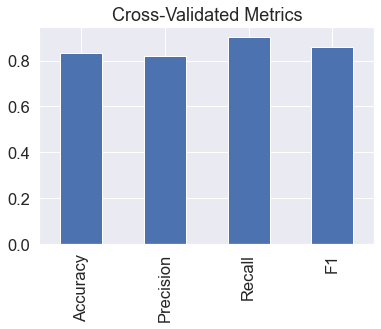

In [147]:
# visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance

Which features contributed most to the outcomes of the model and how ?


In [148]:
# fitting an instance of LogisticRegression (from above)
clf.fit(X_train, y_train);

In [149]:
# Check coef_
clf.coef_

array([[-0.00087664, -0.45317582,  0.72124855, -0.00766236, -0.00248818,
         0.02567552,  0.10419433,  0.02411313, -0.34874364, -0.44837415,
         0.20408284, -0.61214214, -0.64938199]])

The values in the array above show how much each feature contributes to a model's decision on whether patterns in a sample of patients health data favors having heart disease or not.


In [150]:
# matching the features to the columns (for easier viz)
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.0008766427277367934,
 'sex': -0.45317582303871384,
 'cp': 0.7212485477891354,
 'trestbps': -0.007662362235322042,
 'chol': -0.002488178931944684,
 'fbs': 0.025675516370838116,
 'restecg': 0.10419432688200932,
 'thalach': 0.024113128670428363,
 'exang': -0.34874364083699194,
 'oldpeak': -0.44837414696812083,
 'slope': 0.20408284422859044,
 'ca': -0.6121421411486013,
 'thal': -0.6493819880011993}

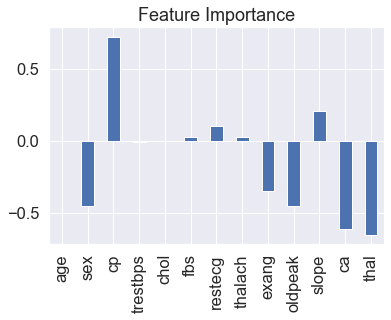

In [151]:
# visualizing feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The taller the bar, the more the feature contributes to the models decision!
   * Negative values means there's a negative correlation. Positive values indicate positive correlation.


In [155]:
# comparing cp and target columns
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [159]:
# comparing fbs and target columns
pd.crosstab(df["fbs"], df["target"])

target,0,1
fbs,,
0,116,142
1,22,23


In [160]:
# comparing sex and target columns
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


When sex is 0 (female), there are almost 3 times as many (72 vs. 24) patients with heart disease (target = 1) than without.

Also, as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of patients who have heart disease and who do not.


At a glance, it appears as if the patient is female, they're more likely to have heart disease.


In [161]:
# contrasting slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


**Slope:** 
> 
  * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.204, not as strong as sex and target but still more than 0.

This positive correlation means our model is deriving the pattern that, as slope increases, so does the target value. **Is this correct?**

Ideally, to confirm, the knowledge of a subject matter expert would be leveraged to fill in the remaining gaps of the machine learning model's highest and lowest correlation. This would help finding out more and gather necessary detail, potentially deleting useless data, or redirecting efforts altogether. 



## 6. Experimentation

Experimentation is ongoing and is continual throughout the machine learning modeling workflow. 

We have tried a few things but of course many more optimizations and experiments can be performed.

> If 95% accuracy at predicting whether or not a patient has heart disease is reached during the proof of concept, the project will be progressed. 

The highest accuracy achieved by any of our models was below 95%.

### Lastly...

**What could be done next?**

* asking for help from teammates - please share any feedback you have
* try different models - XGBoost
* configure hyperparameters (grid) differently for RandomizedSearchCV and GridSearchCV inputs
* make shareable with reproduceable results and environment dependencies
* Reduce Time Between Experiments!